In [24]:
# importing module
from PyPulseHeatPipe import PulseHeatPipe
# plotting
from PyPulseHeatPipe import DataVisualisation

In [25]:
# defining the reference variable
analysis_nf_60fr = PulseHeatPipe("data/al2o3_diwater_exp/60_FR/")
analysis_di_60fr = PulseHeatPipe("data/di_water_exp/60_FR/")

Data loaded from directory: data/al2o3_diwater_exp/60_FR/
Data loaded from directory: data/di_water_exp/60_FR/


In [26]:
# data ETL
df_nf_60fr, df_conv_nf_60fr = analysis_nf_60fr.data_etl()
df_di_60fr, df_conv_di_60fr = analysis_di_60fr.data_etl()

Compiled and converted data is saved at: data/al2o3_diwater_exp/60_FR/'combined_converted_data.csv'
Compiled and converted data is saved at: data/di_water_exp/60_FR/'combined_converted_data.csv'


In [27]:
# calculation of GFE
df_gfe_nf_60fr = analysis_nf_60fr.gibbs_fe(df_conv_nf_60fr)
df_gfe_di_60fr = analysis_di_60fr.gibbs_fe(df_conv_di_60fr)

Gibbs Free Energy calculated data saved at: data/al2o3_diwater_exp/60_FR/'gfe_combined.csv
Gibbs Free Energy calculated data saved at: data/di_water_exp/60_FR/'gfe_combined.csv


In [28]:
# defining visual variable with sample name
visual_nf_60fr = DataVisualisation('Al2O3_DI_60FR')
visual_di_60fr = DataVisualisation('DI_Water_60FR')

Data loaded from directory: Al2O3_DI_60FR
Data loaded from directory: DI_Water_60FR


In [29]:
# data selection wrt Te
df_selected_nf_60fr = analysis_nf_60fr.data_chop(df_gfe_nf_60fr)
df_selected_di_60fr = analysis_di_60fr.data_chop(df_gfe_di_60fr)

Optimal range of temperature(Te) for data selection: [Tmin:300.55, Tmax:368]
Optimal range of temperature(Te) for data selection: [Tmin:297.8167, Tmax:369]


In [30]:
# statistical calculations
df_mean_nf_60fr, df_std_nf_60fr = analysis_nf_60fr.data_stat(df_selected_nf_60fr)
df_mean_di_60fr, df_std_di_60fr = analysis_di_60fr.data_stat(df_selected_di_60fr)

Calculated mean and standard deviation values saved at data/al2o3_diwater_exp/60_FR/'combined_mean.csv' and 'combined_std.csv'
Calculated mean and standard deviation values saved at data/di_water_exp/60_FR/'combined_mean.csv' and 'combined_std.csv'


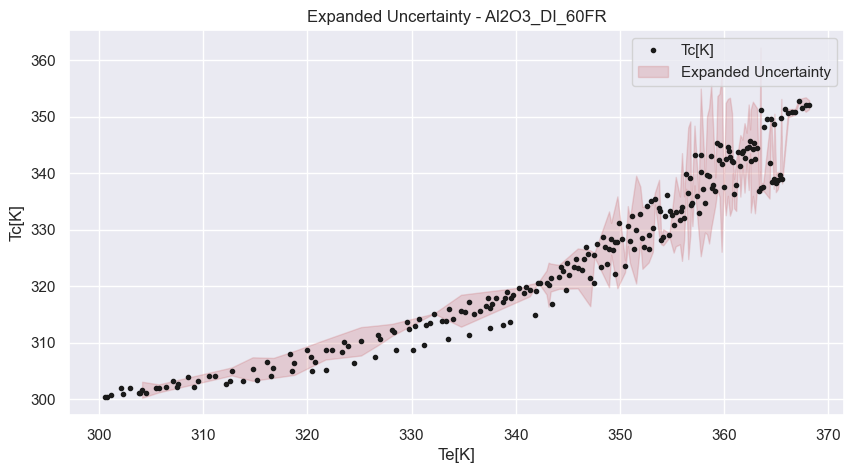

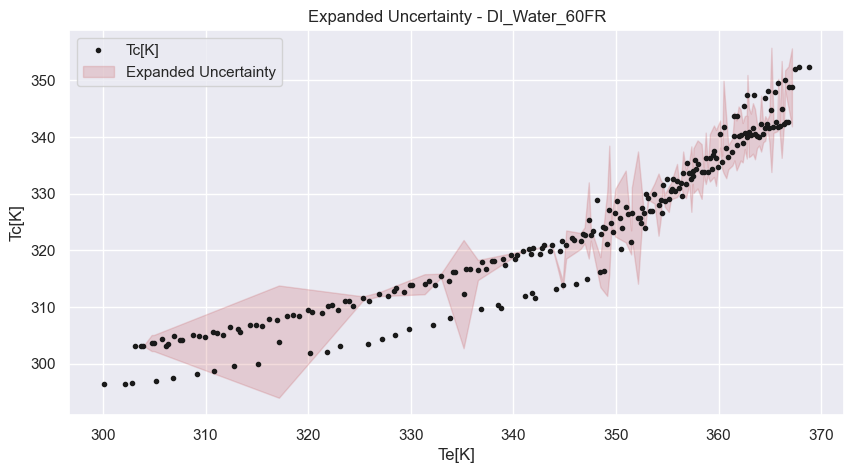

In [40]:
v1=visual_nf_60fr.plot_eu(df_mean_nf_60fr, df_std_nf_60fr, 'Tc[K]')
v2=visual_di_60fr.plot_eu(df_mean_di_60fr, df_std_di_60fr, 'Tc[K]')

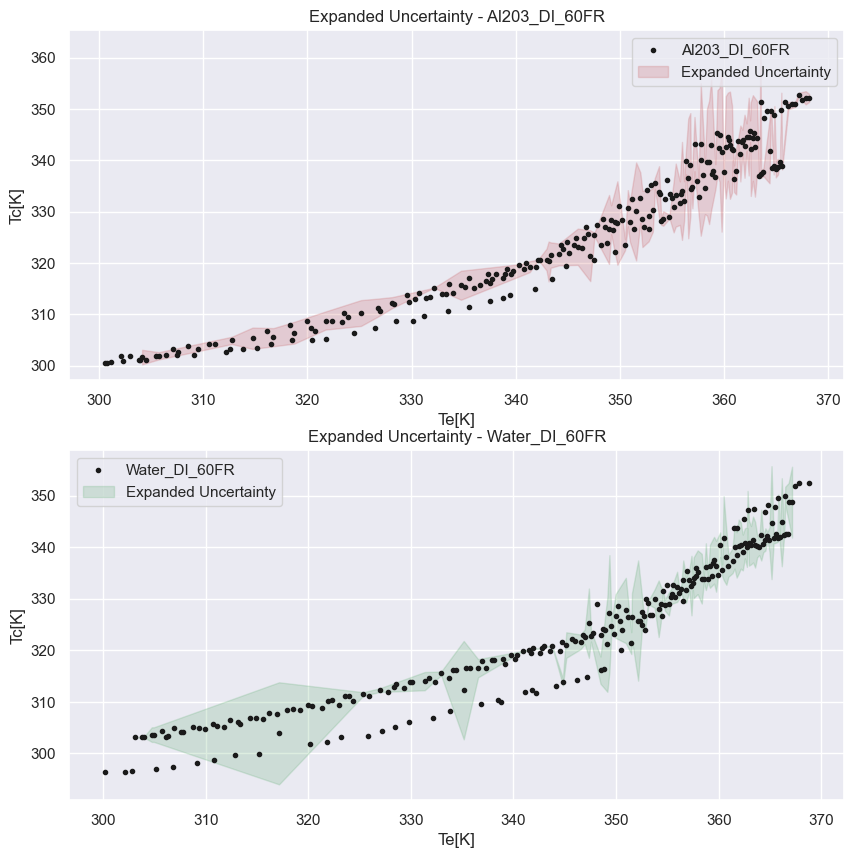

In [53]:
import matplotlib.pyplot as plt

## subploting structure
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)

## defining variable for subplot 2,1,1
x = 'Te[K]'
y = 'Tc[K]'
sample = 'Al203_DI_60FR'
df_mean = df_mean_nf_60fr
df_std = df_std_nf_60fr
point_style = '.k'
point_color = 'r'
# plotting subplot 2,1,1
plt.plot(df_mean[x], df_mean[y], point_style, label=sample)
idx = df_std.index
df_mean_idx = df_mean.loc[idx]
plt.fill_between(df_std[x], df_mean_idx[y] - 2* df_std[y], df_mean_idx[y] + 2* df_std[y],color=point_color, alpha=0.2, label='Expanded Uncertainty')
plt.xlabel(x)
plt.ylabel(y)
plt.title(f"Expanded Uncertainty - {sample}")
plt.legend()

## defining variable for subplot 2,1,2
plt.subplot(2,1,2)
x = 'Te[K]'
y = 'Tc[K]'
sample = 'Water_DI_60FR'
df_mean = df_mean_di_60fr
df_std = df_std_di_60fr
point_style = '.k'
point_color = 'g'
# plotting subplot 2,1,2
plt.plot(df_mean[x], df_mean[y], point_style, label=sample)
idx = df_std.index
df_mean_idx = df_mean.loc[idx]
plt.fill_between(df_std[x], df_mean_idx[y] - 2* df_std[y], df_mean_idx[y] + 2* df_std[y],color=point_color, alpha=0.2, label='Expanded Uncertainty')
plt.xlabel(x)
plt.ylabel(y)
plt.title(f"Expanded Uncertainty - {sample}")
plt.legend()

## saving plot as pdf (best for latex)
plt.savefig('data/ml_result/nf_di_60FR.pdf') # use paper or patent writting work
plt.savefig('data/ml_result/nf_di_60FR.png') # use for presentation work